In [4]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
clf.predict([[2., 2.]])

array([1])

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

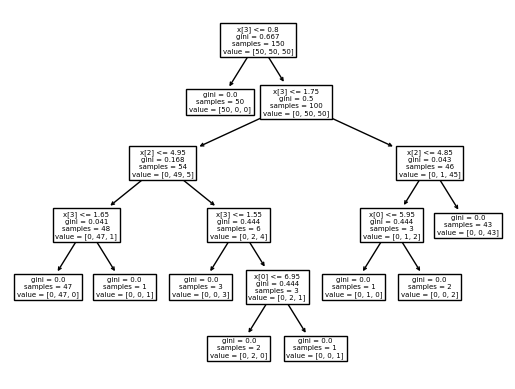

In [5]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

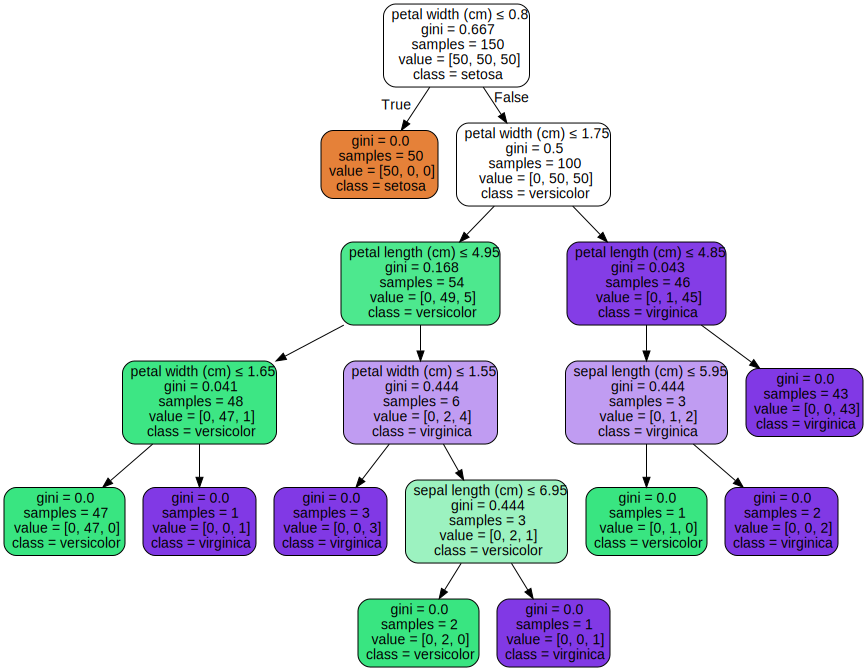

In [8]:
import graphviz
>>> dot_data = tree.export_graphviz(clf, out_file=None)
>>> graph = graphviz.Source(dot_data)
>>> graph.render("iris")
dot_data = tree.export_graphviz(clf, out_file=None,
...                      feature_names=iris.feature_names,
...                      class_names=iris.target_names,
...                      filled=True, rounded=True,
...                      special_characters=True)
>>> graph = graphviz.Source(dot_data)
>>> graph

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


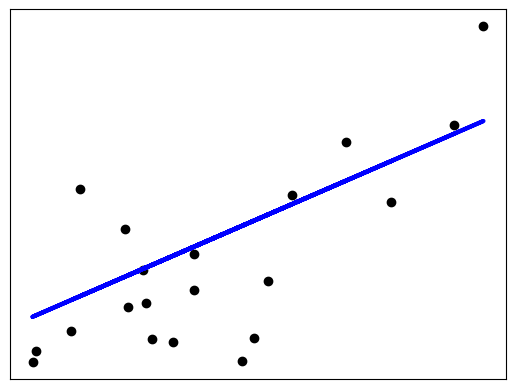

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Text(0.5, 0.98, 'ROC curve comparison')

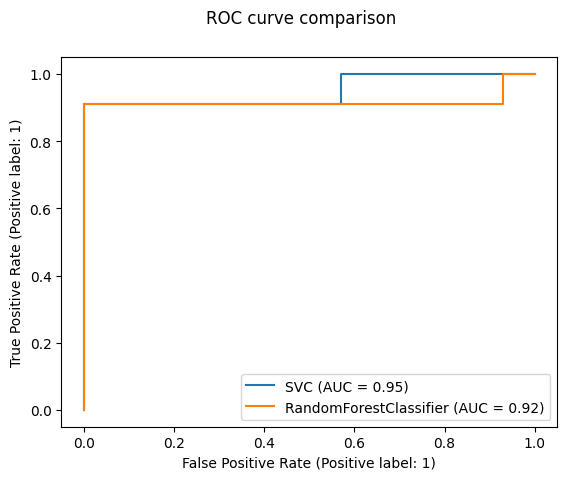

In [12]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

svc = SVC(random_state=42)
svc.fit(X_train, y_train)
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# plot_roc_curve has been removed in version 1.2. From 1.2, use RocCurveDisplay instead.
# svc_disp = plot_roc_curve(svc, X_test, y_test)
# rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=svc_disp.ax_)
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=svc_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")


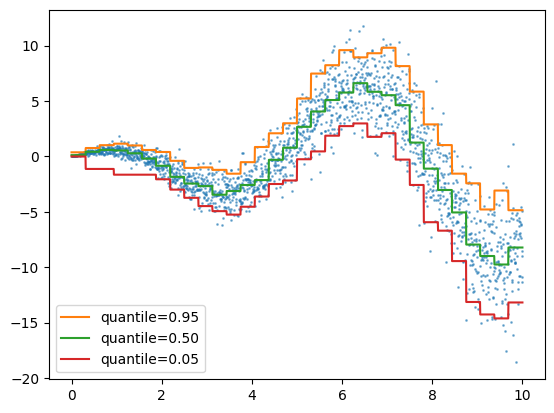

In [13]:
from sklearn.ensemble import HistGradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt

# Simple regression function for X * cos(X)
rng = np.random.RandomState(42)
X_1d = np.linspace(0, 10, num=2000)
X = X_1d.reshape(-1, 1)
y = X_1d * np.cos(X_1d) + rng.normal(scale=X_1d / 3)

quantiles = [0.95, 0.5, 0.05]
parameters = dict(loss="quantile", max_bins=32, max_iter=50)
hist_quantiles = {
    f"quantile={quantile:.2f}": HistGradientBoostingRegressor(
        **parameters, quantile=quantile
    ).fit(X, y)
    for quantile in quantiles
}

fig, ax = plt.subplots()
ax.plot(X_1d, y, "o", alpha=0.5, markersize=1)
for quantile, hist in hist_quantiles.items():
    ax.plot(X_1d, hist.predict(X), label=quantile)
_ = ax.legend(loc="lower left")

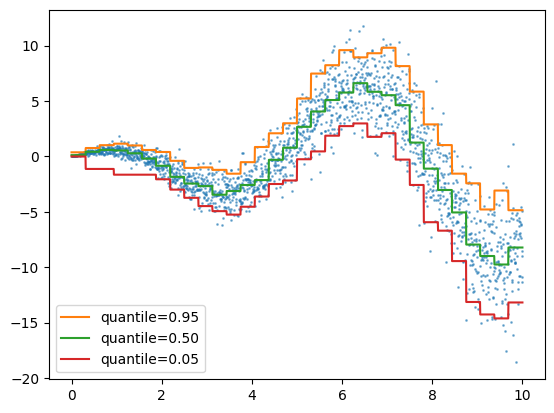

In [14]:
from sklearn.ensemble import HistGradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt

# Simple regression function for X * cos(X)
rng = np.random.RandomState(42)
X_1d = np.linspace(0, 10, num=2000)
X = X_1d.reshape(-1, 1)
y = X_1d * np.cos(X_1d) + rng.normal(scale=X_1d / 3)

quantiles = [0.95, 0.5, 0.05]
parameters = dict(loss="quantile", max_bins=32, max_iter=50)
hist_quantiles = {
    f"quantile={quantile:.2f}": HistGradientBoostingRegressor(
        **parameters, quantile=quantile
    ).fit(X, y)
    for quantile in quantiles
}

fig, ax = plt.subplots()
ax.plot(X_1d, y, "o", alpha=0.5, markersize=1)
for quantile, hist in hist_quantiles.items():
    ax.plot(X_1d, hist.predict(X), label=quantile)
_ = ax.legend(loc="lower left")

NameError: ignored

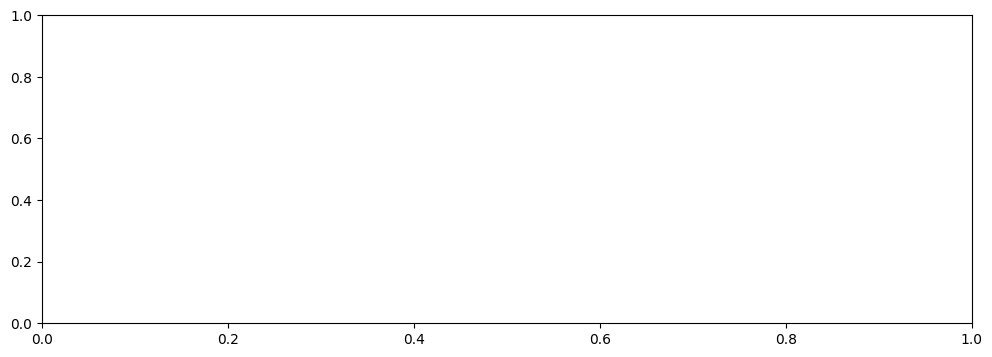

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 4))
average_week_demand = df.groupby(["weekday", "hour"])["count"].mean()
average_week_demand.plot(ax=ax)
_ = ax.set(
    title="Average hourly bike demand during the week",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"],
    xlabel="Time of the week",
    ylabel="Number of bike rentals",
)